In [1]:
foldermonth = '08'

# Importing all Libaries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.lines as mlines
from datetime import datetime
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import figure
import imageio
import matplotlib.dates as mdates
import datetime
from openpyxl import load_workbook

# Data File
PATH = "C:\\Users\\Sam van Dam\\Desktop\\reporting-source.xlsx"

lightblue = '#1D97FF'
darkblue = '#112857'
lessdarkblue = '#175FAB'
whiteblue = '#F4FAFF'
yellow = '#FFCD2F'
red = '#FF0000'
orange = '#FFA500'
purple = '#800080'
violet = '#EE82EE'
green = '#008000'


country_colors = {"NL":'#1D97FF', #Lightblue
                  "NL_DARK":'#175FAB', #DarkLightblue
                  "DE":'#ea492f', #Red
                  "DE_DARK":'#ad2915', #DarkRed
                  "FR":'#4DAF4A', #Green
                  "FR_DARK":'#316c2e', #DarkGreen
                  "AT":'#FF9912', #Orange
                  "AT_DARK":'#d36a00', #DarkOrange
                  "BE":'#984EA3', #Purple
                  "BE_DARK":'#6f3977', #DarkPurple
                  "ES":'#112857', #DarkBlue
                  "ES_DARK":'#063c6a', #DarkDarkBlue
                  "IT":'#FFD700', #Yellow                  
                  "IT_DARK":'#CCCC00', #DarkYellow
                  "UK":'#a65628', #NoIdea
                  "UK_DARK":'#974f25',
                  "GLOBAL":'#974f25', #NoIdea
                  "GLOBAL_DARK":'#974f25'
}

# Making sure every plot uses same RC settings.
SMALL_SIZE = 5.5
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
fonttitle = {'family': 'Verdana',
             'color':  '#112857',
             'size': 14,
             }
plt.rc('font', family='Verdana', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
def read_in_data(path):
    xls = pd.ExcelFile(path)
    df_GLOBAL = pd.read_excel(xls, 'Global', index_col='Months')
    df_NL = pd.read_excel(xls, 'NL', index_col='Months')
    df_DE = pd.read_excel(xls, 'DE', index_col='Months')
    df_AT = pd.read_excel(xls, 'AT', index_col='Months')
    df_BE = pd.read_excel(xls, 'BE', index_col='Months')
    df_ES = pd.read_excel(xls, 'ES', index_col='Months')
    df_IT = pd.read_excel(xls, 'IT', index_col='Months')
    df_FR = pd.read_excel(xls, 'FR', index_col='Months')
    return df_GLOBAL, df_NL, df_DE, df_AT, df_BE, df_ES, df_IT, df_FR 

In [3]:
def main(PATH):
    df_GLOBAL, df_NL, df_DE, df_AT, df_BE, df_ES, df_IT, df_FR = read_in_data(PATH)
    
    return df_GLOBAL, df_NL, df_DE, df_AT, df_BE, df_ES, df_IT, df_FR 


In [4]:
df_GLOBAL, df_NL, df_DE, df_AT, df_BE, df_ES, df_IT, df_FR = main(PATH)

In [5]:
def graph_1():
    import datetime
    # SELECT VARIABLES X, Y, LABELNAMES
    now = datetime.datetime.now()
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    ysbar = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_broker_shipments_revenue']
    ysline = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_broker_shipments_revenue']

    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysbar,ysline])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = 0)
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # create figure
    ax = fig.gca()

    # plot bar
    ax.bar(xs, ysbar, 
           color=country_colors["NL"],
           label="Actual Broker Revenue Global",
           align='center', 
           width=3) 
    # plot line
    ax.plot(xs, ysline,
            color=country_colors["ES"], 
            label="Budget Broker Revenue Global",
            linewidth=2)    

    #Add data lables # NOTE THE FORMATTING HERE, which is STR formatting, does not do anything with the data behind
    for x,y in zip(xs,ysbar):
        bar = "€ {:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     #(x,y-y/2), # this is the point to label
                     (x,y-y+2000000),
                     ha='center', # middle of the bar
                     fontsize=6
                     )     
    for x,y in zip(xs,ysline):
        bar = "€ {:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )     
                     
    #ax.set_ylabel('Revenue x1000')
    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x/1000)) for x in ax.get_yticks().tolist()])

    # format the datetime to a feb-20 style, and place them on the correct spot
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator)    

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=2, frameon=False)
    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph1', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')

    plt.show()


In [6]:
def graph_2():
    import datetime
    # SELECT VARIABLES X, Y, LABELNAMES
    now = datetime.datetime.now()
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    ysbar = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_revenue_broker']
    ysline = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_revenue_broker']

    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysbar,ysline])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = 0)
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # create figure
    ax = fig.gca()

    # plot bar
    ax.bar(xs, ysbar, 
           color=country_colors["NL"],
           label="Actual Broker Net Rev Global",
           align='center', 
           width=3) 
    # plot line
    ax.plot(xs, ysline,
            color=country_colors["ES"], 
            label="Budget Broker Net Rev Global",
            linewidth=2)    

    #Add data lables
    for x,y in zip(xs,ysbar):
        bar = "€ {:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     #(x,y-y/2), # this is the point to label
                     (x,y-y+300000),
                     ha='center', # middle of the bar
                     fontsize=6
                     )     
    for x,y in zip(xs,ysline):
        bar = "€ {:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )     

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x/1000)) for x in ax.get_yticks().tolist()])
    
    # format the datetime to a feb-20 style, and place them on the correct spot
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator)   

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=2, frameon=False)

    
    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph2', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
    plt.show()

In [7]:
def graph_3():
    import datetime
        # SELECT VARIABLES X, Y, LABELNAMES
    now = datetime.datetime.now()
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    ysbar = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_total_broker_shipments']
    ysline = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_broker_shipments']

    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysbar,ysline])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = 0)
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # create figure
    ax = fig.gca()

    # plot bar
    ax.bar(xs, ysbar, 
           color=country_colors["NL"],
           label="Actual Broker Shipments",
           align='center', 
           width=3) 
    # plot line
    ax.plot(xs, ysline,
            color=country_colors["ES"], 
            label="Budget Broker Shipments",
            linewidth=2)    

    #Add data lables
    for x,y in zip(xs,ysbar):
        bar = "{:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     #(x,y-y/2), # this is the point to label
                     (x,y-y+400000),
                     ha='center', # middle of the bar
                     fontsize=6
                     )     
    for x,y in zip(xs,ysline):
        bar = "{:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )     

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks().tolist()]) 

    # format the datetime to a feb-20 style, and place them on the correct spot
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator)    

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=2, frameon=False)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph3', bbox_inches='tight', dpi=300)
    plt.show()

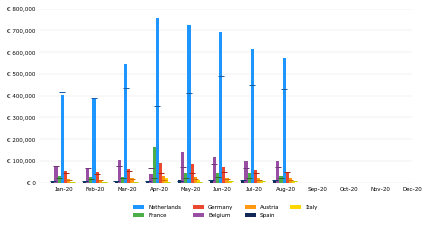

In [8]:

import datetime
now = datetime.datetime.now()
# SELECT VARIABLES X, Y, LABELNAMES
xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
axbar_NL = df_NL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_revenue_broker']
axbar_DE = df_DE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_revenue_broker']
axbar_FR = df_FR[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_revenue_broker']
axbar_BE = df_BE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_revenue_broker']
axbar_AT = df_AT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_revenue_broker']
axbar_ES = df_ES[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_revenue_broker']
axbar_IT = df_IT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_revenue_broker'] 

#BUDGET VALUES
axbar_NL1 = df_NL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_revenue_broker']
axbar_DE1 = df_DE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_revenue_broker']
axbar_FR1 = df_FR[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_revenue_broker']
axbar_BE1 = df_BE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_revenue_broker']
axbar_AT1 = df_AT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_revenue_broker']
axbar_ES1 = df_ES[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_revenue_broker']
axbar_IT1 = df_IT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_revenue_broker'] 

width = 0.1
N = 12
ind = np.arange(N)

# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))
# get rid of the frame (gca = getcurrentaxis)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# set grid lines
plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

# remove ticks
plt.tick_params(axis=u'both', which=u'both',length=0)

# define data
ax = fig.gca()

rects4 = ax.bar(ind, axbar_NL, 
        color=country_colors["NL"],
        label="Netherlands",
        align='center', 
        width=width)  
rects5 = ax.bar(ind-width, axbar_FR, 
        color=country_colors["FR"],
        label="France",
        align='center', 
        width=width) 
rects3 = ax.bar(ind+width, axbar_DE, 
        color=country_colors["DE"],
        label="Germany",
        align='center', 
        width=width) 
rects6 = ax.bar(ind-width-width, axbar_BE, 
        color=country_colors["BE"],
        label="Belgium",
        align='center', 
        width=width)    
rects2 = ax.bar(ind+width+width, axbar_AT, 
        color=country_colors["AT"],
        label="Austria",
        align='center', 
        width=width) 
rects7 = ax.bar(ind-width-width-width, axbar_ES, 
        color=country_colors["ES"],
        label="Spain",
        align='center', 
        width=width)   
rects1 = ax.bar(ind+width+width+width, axbar_IT, 
        color=country_colors["IT"],
        label="Italy",
        align='center', 
        width=width)   

total_months = len(axbar_NL.dropna())

def autolabel(rects, budget_country,kleur1,kleur2):
    """
    Attach a text label above each bar displaying its height
    """
    i = 0
    for rect in rects:
        height = budget_country[i]
        ax.plot(rect.get_x()+(0.5*width), height,
            "_", color=kleur1, markersize=6, markeredgecolor=kleur2)
        #ax.plot(height, marker="_")
        i = i +1
        if i == total_months:
            break
autolabel(rects1, axbar_IT1,country_colors["IT"],country_colors["IT_DARK"])
autolabel(rects2, axbar_AT1,country_colors["AT"],country_colors["AT_DARK"])  
autolabel(rects3, axbar_DE1,country_colors["DE"],country_colors["DE_DARK"])  
autolabel(rects4, axbar_NL1,country_colors["NL"],country_colors["NL_DARK"])  
autolabel(rects5, axbar_FR1,country_colors["FR"],country_colors["FR_DARK"])  
autolabel(rects6, axbar_BE1,country_colors["BE"],country_colors["BE_DARK"])  
autolabel(rects7, axbar_ES1,country_colors["ES"],country_colors["ES_DARK"])  

# FORMATTING THE NUMBERS
ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])     

# super mega beun, maar anders krijg je een object not callable error, terwijl datetime hierboven geimporteerd is, fck vaag, maar werkt
from datetime import datetime
ax.set_xticks(ind+(width/2))
ax.set_xticklabels([datetime(2020,_,1).strftime('%b-%y') for _ in range(1,13)])  

plt.ylim(ymax = 800001, ymin = 0)

# Add legend, this can only be after 'labels' are defined
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=4, frameon=False)

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph81', bbox_inches='tight', dpi=300)

plt.show()

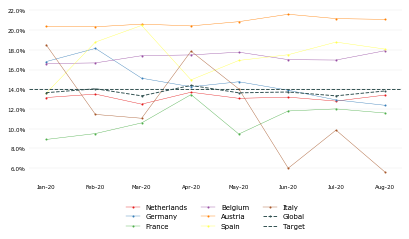

In [9]:
# BROKER MARGIN PER COUNTRY LINES
# METRICS GRAPHS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#def margins():
import datetime

c1 = '#E41A1C'
c2 = '#377EB8'    
c3 = '#4DAF4A'    
c4 = '#984EA3'
c5 = '#FF7F00'
c6 = '#FFFF4E'
c7 = '#A65628'    
c8 = '#E8D71B'

# SELECT VARIABLES X, Y, LABELNAMES
# START
previousmonth = datetime.datetime.now().month-1
previousyear = datetime.datetime.now().year-1
start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
# TILL
previousmonth = datetime.datetime.now().month-1
currentyear = datetime.datetime.now().year
till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

# SELECT VARIABLES X, Y, LABELNAMES
xs = df_GLOBAL.loc[start:till].index
ysline_NL = df_NL.loc[start:till]['broker_gross_margin'] 
ysline_DE = df_DE.loc[start:till]['broker_gross_margin'] 
ysline_AT = df_AT.loc[start:till]['broker_gross_margin'] 
ysline_FR = df_FR.loc[start:till]['broker_gross_margin']     
ysline_BE = df_BE.loc[start:till]['broker_gross_margin'] 
ysline_ES = df_ES.loc[start:till]['broker_gross_margin']     
ysline_IT = df_IT.loc[start:till]['broker_gross_margin'] 
ysline_GLOBAL = df_GLOBAL.loc[start:till]['broker_gross_margin']     

# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))

# get rid of the frame (gca = getcurrentaxis)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# set grid lines
plt.grid(linestyle='--', linewidth=0.1, axis='y', color='grey')

# create plot
ax = fig.gca()

linewidth = 0.4
# Plot Countries
ax.plot(xs, ysline_NL, color=c1, label="Netherlands", linewidth=linewidth, marker='o', markersize=1)    
ax.plot(xs, ysline_DE, color=c2, label="Germany", linewidth=linewidth, marker='o', markersize=1) 
ax.plot(xs, ysline_FR, color=c3, label="France", linewidth=linewidth, marker='o', markersize=1)  
ax.plot(xs, ysline_BE, color=c4, label="Belgium", linewidth=linewidth, marker='o', markersize=1)    
ax.plot(xs, ysline_AT, color=c5, label="Austria", linewidth=linewidth, marker='o', markersize=1) 
ax.plot(xs, ysline_ES, color=c6, label="Spain", linewidth=linewidth, marker='o', markersize=1)      
ax.plot(xs, ysline_IT, color=c7, label="Italy", linewidth=linewidth, marker='o', markersize=1) 
ax.plot(xs, ysline_GLOBAL, color='#2F4F4F', label="Global", linewidth=0.95, linestyle='--', marker='o', markersize=1)  
# Plot Target
ax.axhline(y=0.14, color='#2F4F4F', label = 'Target', linestyle='--',linewidth=0.95)    

# Format Y-Axis
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))    

# Format X-Axis    
formatter = mdates.DateFormatter("%b-%y") 
ax.xaxis.set_major_formatter(formatter)
locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator) 

# Add legend, this can only be after 'labels' are defined
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=3, prop={'size': 7}, frameon=False)

ax.tick_params(axis=u'both', which=u'both',length=0)    

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\margins', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
plt.show()

<Figure size 481.68x230.4 with 0 Axes>

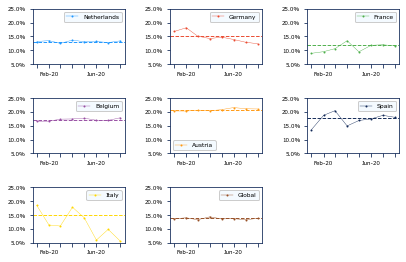

In [10]:
# BROKER MARGIN PER COUNTRY LINES
# METRICS GRAPHS!
#def margins():
import datetime

# SELECT VARIABLES X, Y, LABELNAMES
# START
previousmonth = datetime.datetime.now().month-1
previousyear = datetime.datetime.now().year-1
start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
# TILL
previousmonth = datetime.datetime.now().month-1
currentyear = datetime.datetime.now().year
till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

# SELECT VARIABLES X, Y, LABELNAMES
xs = df_GLOBAL.loc[start:till].index
ysline_NL = df_NL.loc[start:till]['broker_gross_margin'] 
ysline_DE = df_DE.loc[start:till]['broker_gross_margin'] 
ysline_AT = df_AT.loc[start:till]['broker_gross_margin'] 
ysline_FR = df_FR.loc[start:till]['broker_gross_margin']     
ysline_BE = df_BE.loc[start:till]['broker_gross_margin'] 
ysline_ES = df_ES.loc[start:till]['broker_gross_margin']     
ysline_IT = df_IT.loc[start:till]['broker_gross_margin'] 
ysline_GLOBAL = df_GLOBAL.loc[start:till]['broker_gross_margin']     

list_countries = ["netherlands", "germany", "france", "belgium", "austria","spain", "italy", "global"]

plots = {
  "netherlands": [ysline_NL, country_colors["NL"], "Netherlands", 0.13],  
  "germany": [ysline_DE, country_colors["DE"], "Germany", 0.15],
  "france": [ysline_FR, country_colors["FR"], "France", 0.12],
  "belgium": [ysline_BE, country_colors["BE"], "Belgium", 0.17],
  "austria": [ysline_AT, country_colors["AT"], "Austria", 0.208],
  "spain": [ysline_ES, country_colors["ES"], "Spain", 0.18],
  "italy": [ysline_IT, country_colors["IT"], "Italy", 0.15],
  "global": [ysline_GLOBAL, country_colors["GLOBAL"], "Global", 0.14]
}


# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))

fig, ax = plt.subplots(3, 3)

linewidth = 0.4

import matplotlib.pyplot as plt
plt.locator_params(axis='x', nbins=1)
formatter = mdates.DateFormatter("%b-%y") 

i = 0
for a in range(3):
    for b in range(3):
        if i < 8:
            ax[a,b].plot(xs, plots[list_countries[i]][0], color=plots[list_countries[i]][1], label=plots[list_countries[i]][2],                               linewidth=linewidth, marker='o', markersize=1) 
            ax[a,b].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))  
            ax[a,b].xaxis.set_major_formatter(formatter)
            ax[a,b].legend(prop={'size': 6}, facecolor=whiteblue, framealpha=1,frameon = 1)

            ax[a,b].axhline(y=plots[list_countries[i]][3], color=plots[list_countries[i]][1], label = 'Target', linestyle='--',                                  linewidth=0.95)    
            
            # Remove label x-axis, reduce to two
            every_nth = 4
            for n, label in enumerate(ax[a,b].xaxis.get_ticklabels()):
                if n % every_nth != 1:
                    label.set_visible(False)

            # Change color of the ticks and spines    
            ax[a,b].tick_params(color=darkblue)
            for spine in ax[a,b].spines.values():
                spine.set_edgecolor(darkblue)

            # Make ranges fit better on the y axis.
            #ax[a,b].set_ylim([plots[list_countries[i]][0].min()*0.85, plots[list_countries[i]][0].max()*1.15])
            ax[a,b].set_ylim(0.05, 0.25)
            i = i + 1 
               
        else: 
            break
    
# Add some spacing between the graphs and delete the last graph.       
fig.tight_layout(pad=2)    
fig.delaxes(ax[2][2])

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\margins', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
plt.show()

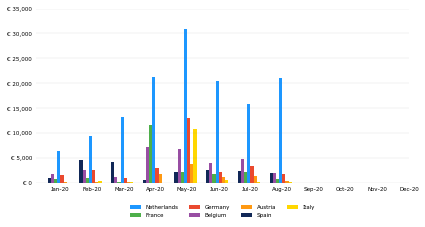

In [11]:
# NEW NET REVENUE BROKER PER COUNTRY BARS
import datetime
now = datetime.datetime.now()
# SELECT VARIABLES X, Y, LABELNAMES
xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
axbar_NL = df_NL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_net_rev_broker']
axbar_DE = df_DE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_net_rev_broker']
axbar_FR = df_FR[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_net_rev_broker']
axbar_BE = df_BE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_net_rev_broker']
axbar_AT = df_AT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_net_rev_broker']
axbar_ES = df_ES[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_net_rev_broker']
axbar_IT = df_IT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_net_rev_broker'] 

width = 0.1
N = 12
ind = np.arange(N)

# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))
# get rid of the frame (gca = getcurrentaxis)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# set grid lines
plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

# remove ticks
plt.tick_params(axis=u'both', which=u'both',length=0)

# define data
ax = fig.gca()

# [Label, Bar color, Budget color]
NL = ['Netherlands','#1D97FF','#112857']
DE = ['Germany','#ea492f','#ad2915']
FR = ['France', '#4DAF4A','#316c2e']
AT = ['Austria', '#FF7F00','#d36a00']
BE = ['Belgium', '#984EA3','#6f3977']
IT = ['Italy', '#ffff77','#ffff00']
ES = ['Spain', '#0967B5','#063c6a']
UK = ['United Kingdom','#a65628','#974f25']

rects4 = ax.bar(ind, axbar_NL, 
        color=country_colors["NL"],
        label="Netherlands",
        align='center', 
        width=width)  
rects5 = ax.bar(ind-width, axbar_FR, 
        color=country_colors["FR"],
        label="France",
        align='center', 
        width=width) 
rects3 = ax.bar(ind+width, axbar_DE, 
        color=country_colors["DE"],
        label="Germany",
        align='center', 
        width=width) 
rects6 = ax.bar(ind-width-width, axbar_BE, 
        color=country_colors["BE"],
        label="Belgium",
        align='center', 
        width=width)    
rects2 = ax.bar(ind+width+width, axbar_AT, 
        color=country_colors["AT"],
        label="Austria",
        align='center', 
        width=width) 
rects7 = ax.bar(ind-width-width-width, axbar_ES, 
        color=country_colors["ES"],
        label="Spain",
        align='center', 
        width=width)   
rects1 = ax.bar(ind+width+width+width, axbar_IT, 
        color=country_colors["IT"],
        label="Italy",
        align='center', 
        width=width)   

# FORMATTING THE NUMBERS
ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])     

# super mega beun, maar anders krijg je een object not callable error, terwijl datetime hierboven geimporteerd is, fck vaag, maar werkt
from datetime import datetime
ax.set_xticks(ind+(width/2))
ax.set_xticklabels([datetime(2020,_,1).strftime('%b-%y') for _ in range(1,13)])  

plt.ylim(ymax = 35001, ymin = 0)

# Add legend, this can only be after 'labels' are defined
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=4, frameon=False)

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\new_net_rev_broker_per_country', bbox_inches='tight', dpi=300)

plt.show()

In [12]:
def graph_4():
    import datetime
        # SELECT VARIABLES X, Y, LABELNAMES
    now = datetime.datetime.now()
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    ysbar = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['broker_gross_margin']
    ysline = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_broker_gross_margin']
    
    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysbar,ysline])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)
    # DETERMINE START Y-AXIS
    num1=int(dataframes_concatenated.min())/6
    start_y_axis = int(dataframes_concatenated.min()-num1)

    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis)    
    
    # remove ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # create figure
    ax = fig.gca()

    # plot bar
    ax.bar(xs, ysbar, 
           color=country_colors["NL"],
           label="Broker Global Margin",
           align='center', 
           width=3) 
    # plot line
    ax.plot(xs, ysline,
        color=country_colors["ES"], 
        label="Target Broker Global Margin",
        linewidth=2,
        linestyle='-')  
    
    #Add data lables
    for x,y in zip(xs,ysbar):
        bar = "{:,.2f}%".format(y)
        plt.annotate(bar, # this is the text
                     (x,y-y/2),
                     ha='center', # middle of the bar
                     fontsize=6
                     )    

        
    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['{:,.2f}%'.format(int(x)) for x in ax.get_yticks().tolist()])            
        
    # Format X-Axis    
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator)   

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=2, frameon=False)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph4', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
    plt.show()

In [13]:
def graph_5():
    import datetime
        # SELECT VARIABLES X, Y, LABELNAMES
    now = datetime.datetime.now()
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    ysbar = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_net_subscriptions_revenue']
    ysline = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_net_subscriptions_revenue']

    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysbar,ysline])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = 0)
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # create figure
    ax = fig.gca()

    # plot bar
    ax.bar(xs, ysbar, 
           color=country_colors["NL"],
           label="Actual (Net) Revenue SaaS Global",
           align='center', 
           width=3) 
    # plot line
    ax.plot(xs, ysline,
            color=country_colors["ES"], 
            label="Budget (Net) Revenue SaaS Global",
            linewidth=2)    

    #Add data lables
    for x,y in zip(xs,ysbar):
        bar = "€ {:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     #(x,y-y/2), # this is the point to label
                     (x,y-y+110000),
                     ha='center', # middle of the bar
                     fontsize=6
                     )     
    for x,y in zip(xs,ysline):
        bar = "€ {:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )     

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x/1000)) for x in ax.get_yticks().tolist()]) 

    # format the datetime to a feb-20 style, and place them on the correct spot
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator)    

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=2, frameon=False)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph5', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
    plt.show()

In [14]:
def graph_6():
    import datetime
        # SELECT VARIABLES X, Y, LABELNAMES
    now = datetime.datetime.now()
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    ysbar = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_subscription_value']
    ysline = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_subscription_value']

    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysbar,ysline])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = 0)
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # create figure
    ax = fig.gca()

    # plot bar
    ax.bar(xs, ysbar, 
           color=country_colors["NL"],
           label="Actual Subscription Value Global",
           align='center', 
           width=3) 
    # plot line
    ax.plot(xs, ysline,
            color=country_colors["ES"], 
            label="Budget Subscription Value Global",
            linewidth=2)    

    #Add data lables
    for x,y in zip(xs,ysbar):
        bar = "€ {:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     #(x,y-y/2), # this is the point to label
                     (x,y-y+110000),
                     ha='center', # middle of the bar
                     fontsize=6
                     )     
    for x,y in zip(xs,ysline):
        bar = "€ {:,.0f}".format(y/1000)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )     

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x/1000)) for x in ax.get_yticks().tolist()])   

    # format the datetime to a feb-20 style, and place them on the correct spot
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator)    

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=2, frameon=False)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph6', bbox_inches='tight', dpi=300)
    plt.show()

In [15]:
def graph_7(): 
        import datetime

        now = datetime.datetime.now()
        # SELECT VARIABLES X, Y, LABELNAMES
        xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
        axbar1 = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_net_mrr_new_growth']
        axbar2 = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_mrr']
        ysline1 = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_new_net_mrr']
        ysline2 = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_new_mrr']   
        width = 0.35
        N = 12
        ind = np.arange(N)

        # Set figure size 
        fig = plt.figure(figsize=(6.69, 3.2))
        # get rid of the frame (gca = getcurrentaxis)
        for spine in plt.gca().spines.values():
                spine.set_visible(False)
        # set grid lines
        plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

        # remove ticks
        plt.tick_params(axis=u'both', which=u'both',length=0)

        # define data
        ax = fig.gca()

        # plot line
        ax.plot(ind, ysline1,
                color=country_colors["NL"], 
                label="Budget New Net MRR Global",
                linewidth=1,
                linestyle='--')  
        # plot line
        ax.plot(ind, ysline2,
                color=country_colors["ES"], 
                label="Budget New MRR Global",
                linewidth=1,
                linestyle='--')  
        # plot bar
        ax.bar(ind, axbar1, 
                color=country_colors["NL"],
                label="New Net MRR Global",
                align='center', 
                width=width) 
        ax.bar(ind+width, axbar2, 
                color=country_colors["ES"],
                label="New MRR Global",
                align='center', 
                width=width)   


        for x,y in zip(ind,axbar1):
                bar = round(y/1000,1)
                if bar != 0.0:
                        plt.annotate(bar, # this is the text
                                        (x,y/2), # this is the point to label
                                        textcoords="offset points", # how to position the text
                                        xytext=(0,0), # distance from text to points (x,y)
                                        ha='center',
                                        #rotation=90,
                                        fontsize=4,
                                        color='white'
                                        
                                        ) 

        for x,y in zip(ind+width,axbar2):
                bar = round(y/1000,1)
                if bar != 0.0:
                        plt.annotate(bar, # this is the text
                                        (x,y/2), # this is the point to label
                                        textcoords="offset points", # how to position the text
                                        xytext=(0,0), # distance from text to points (x,y)
                                        ha='center',
                                        #rotation=90,
                                        fontsize=4,
                                        color='white'
                                        
                                        ) 

        # for x,y in zip(df.index,df["Churn"]+df["Downsell"]):
        #     bar = "€ {:,.0f}".format(y)
        #     plt.annotate(bar, # this is the text
        #                     (x,y), # this is the point to label
        #                     textcoords="offset points", # how to position the text
        #                     xytext=(0,-5), # distance from text to points (x,y)
        #                     ha='center',
        #                     fontsize=6
        #                     ) 







        # FORMATTING THE NUMBERS
        ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])     

        # super mega beun, maar anders krijg je een object not callable error, terwijl datetime hierboven geimporteerd is, fck vaag, maar werkt
        from datetime import datetime
        ax.set_xticks(ind+(width/2))
        ax.set_xticklabels([datetime(2020,_,1).strftime('%b-%y') for _ in range(1,13)])  

        # Add legend, this can only be after 'labels' are defined
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=2, frameon=False)



        plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph7', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
        plt.show()

#https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

In [16]:
def graph_8(): 
    import datetime
    now = datetime.datetime.now()
    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    axbar_NL = df_NL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_subscription_value']
    axbar_DE = df_DE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_subscription_value']
    axbar_FR = df_FR[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_subscription_value']
    axbar_BE = df_BE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_subscription_value']
    axbar_AT = df_AT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_subscription_value']
    axbar_ES = df_ES[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_subscription_value']
    axbar_IT = df_IT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['actual_subscription_value'] 

    #BUDGET VALUES
    axbar_NL1 = df_NL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_subscription_value']
    axbar_DE1 = df_DE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_subscription_value']
    axbar_FR1 = df_FR[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_subscription_value']
    axbar_BE1 = df_BE[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_subscription_value']
    axbar_AT1 = df_AT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_subscription_value']
    axbar_ES1 = df_ES[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_subscription_value']
    axbar_IT1 = df_IT[df_GLOBAL.index.map(lambda x : x.year == now.year)]['budget_subscription_value'] 

    width = 0.1
    N = 12
    ind = np.arange(N)

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([axbar_NL,axbar_DE,axbar_FR1])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)
    plt.ylim(ymax = height_y_axis, ymin = 0)



    # remove ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # define data
    ax = fig.gca()

    # plot bar
    rects4 = ax.bar(ind, axbar_NL, 
           color=country_colors["NL"],
           label="Netherlands",
           align='center', 
           width=width)  
    rects5 = ax.bar(ind-width, axbar_FR, 
           color=country_colors["FR"],
           label="France",
           align='center', 
           width=width) 
    rects3 = ax.bar(ind+width, axbar_DE, 
           color=country_colors["DE"],
           label="Germany",
           align='center', 
           width=width) 
    rects6 = ax.bar(ind-width-width, axbar_BE, 
           color=country_colors["BE"],
           label="Belgium",
           align='center', 
           width=width)    
    rects2 = ax.bar(ind+width+width, axbar_AT, 
           color=country_colors["AT"],
           label="Austria",
           align='center', 
           width=width) 
    rects7 = ax.bar(ind-width-width-width, axbar_ES, 
           color=country_colors["ES"],
           label="Spain",
           align='center', 
           width=width)   
    rects1 = ax.bar(ind+width+width+width, axbar_IT, 
           color=country_colors["IT"],
           label="Italy",
           align='center', 
           width=width)   

    total_months = len(axbar_NL.dropna())


    def autolabel(rects, budget_country,kleur1,kleur2):
        """
        Attach a text label above each bar displaying its height
        """
        i = 0
        for rect in rects:
            height = budget_country[i]
            ax.plot(rect.get_x()+(0.5*width), height,
               "_", color=kleur1, markersize=6, markeredgecolor=kleur2)
            #ax.plot(height, marker="_")
            i = i +1
            if i == total_months:
                break

    autolabel(rects1, axbar_IT1,country_colors["IT"],country_colors["IT_DARK"])
    autolabel(rects2, axbar_AT1,country_colors["AT"],country_colors["AT_DARK"])  
    autolabel(rects3, axbar_DE1,country_colors["DE"],country_colors["DE_DARK"])  
    autolabel(rects4, axbar_NL1,country_colors["NL"],country_colors["NL_DARK"])  
    autolabel(rects5, axbar_FR1,country_colors["FR"],country_colors["FR_DARK"])  
    autolabel(rects6, axbar_BE1,country_colors["BE"],country_colors["BE_DARK"])  
    autolabel(rects7, axbar_ES1,country_colors["ES"],country_colors["ES_DARK"])  


    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])     

    # super mega beun, maar anders krijg je een object not callable error, terwijl datetime hierboven geimporteerd is, fck vaag, maar werkt
    from datetime import datetime
    ax.set_xticks(ind+(width/2))
    ax.set_xticklabels([datetime(2020,_,1).strftime('%b-%y') for _ in range(1,13)])  

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=4, frameon=False)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph8', bbox_inches='tight', dpi=300)

    plt.show()

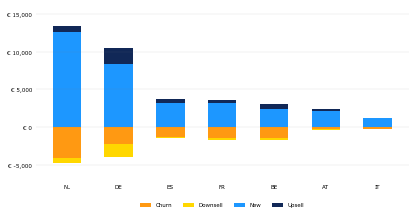

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# convert the workbook to a useful Dataframe
wb = load_workbook(PATH)
churn = []
upsell = []
downsell = []
new = []
columns = wb.get_sheet_names()
index = ["Churn", "Upsell", "Downsell", "New"]
for sheet in wb.worksheets:
    churn.append(sheet .cell(row = 19, column = 24).value)
    upsell.append(sheet .cell(row = 19, column = 22).value)
    downsell.append(sheet .cell(row = 19, column = 23).value)
    new.append(sheet .cell(row = 19, column = 21).value) 
df_test = pd.DataFrame([churn,upsell,downsell,new], index=index, columns=columns).T
df = df_test.drop('Global')
df = df.sort_values(by=['New'], ascending=False)

# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))
# get rid of the frame (gca = getcurrentaxis)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# set grid lines
plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

# remove ticks
plt.tick_params(axis=u'both', which=u'both',length=0)

# define data
ax = fig.gca()

ax.bar(df.index, df["Churn"], label="Churn", color=country_colors["AT"], width=0.55)
ax.bar(df.index, df["Downsell"], bottom=df["Churn"], label="Downsell", color=country_colors["IT"], width=0.55)
ax.bar(df.index, df["New"], label="New", color=country_colors["NL"], width=0.55)
ax.bar(df.index, df["Upsell"], bottom=df["New"], label="Upsell", color=country_colors["ES"], width=0.55)

# for x,y in zip(df.index,df["New"]+df["Upsell"]):
#     bar = "€ {:,.0f}".format(y)
#     plt.annotate(bar, # this is the text
#                     (x,y), # this is the point to label
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,5), # distance from text to points (x,y)
#                     ha='center',
#                     fontsize=6
#                     ) 


# for x,y in zip(df.index,df["Churn"]+df["Downsell"]):
#     bar = "€ {:,.0f}".format(y)
#     plt.annotate(bar, # this is the text
#                     (x,y), # this is the point to label
#                     textcoords="offset points", # how to position the text
#                     xytext=(0,-5), # distance from text to points (x,y)
#                     ha='center',
#                     fontsize=6
#                     ) 

# 
plt.ylim(ymax = round((df["New"].max() + df["Upsell"].max())*1.1,-3), ymin = round((df["Churn"].min() + df["Downsell"].min())*1.2,-3))

# FORMATTING THE NUMBERS
ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

# Display the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=4, frameon=False)

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph9', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')

plt.show()

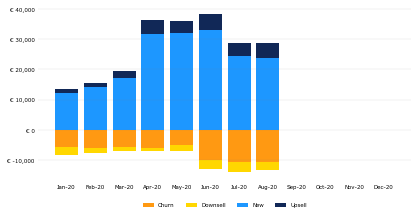

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
# SELECT VARIABLES X, Y, LABELNAMES
now = datetime.datetime.now()
xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index.astype(str)

new_mrr = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['new_mrr']
upsell = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['upsell']
downsell = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['downsell']
churn = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)]['churn']

# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))
# get rid of the frame (gca = getcurrentaxis)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# set grid lines
plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

# remove ticks
plt.tick_params(axis=u'both', which=u'both',length=0)

# define data
ax = fig.gca()

ax.bar(xs, churn, label="Churn", color=country_colors["AT"])
ax.bar(xs, downsell, bottom=churn, label="Downsell", color=country_colors["IT"])
ax.bar(xs, new_mrr, label="New", color=country_colors["NL"])
ax.bar(xs, upsell, bottom=new_mrr, label="Upsell", color=country_colors["ES"])

# FORMATTING THE Y-NUMBERS
ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

# Height Y axis
#plt.ylim(ymax = round((new_mrr.max() + upsell.max())*1.1,-3), ymin = round((churn.min() + downsell.min())*1.5,-3))

# beun
from datetime import datetime
ax.set_xticklabels([datetime(2020,_,1).strftime('%b-%y') for _ in range(1,13)])  

# Display the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=4, frameon=False)

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph91', bbox_inches='tight', dpi=300)

plt.show()

In [19]:
def graph_10():
    # SELECT VARIABLES X, Y, LABELNAMES
    import datetime
    now = datetime.datetime.now()
    
    # START
    previousmonth = datetime.datetime.now().month-1
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
    # TILL
    previousmonth = datetime.datetime.now().month-1
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'
    
    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL.loc[start:till].index
    ysline_BV = df_NL.loc[start:till]['customer_acquisition_cost']
    ysline_GMBH = df_DE.loc[start:till]['customer_acquisition_cost']
    ysline_SAS = df_FR.loc[start:till]['customer_acquisition_cost']     
    
    
    
    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysline_BV,ysline_GMBH,ysline_SAS])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)
    # DETERMINE START Y-AXIS
    num1=int(dataframes_concatenated.min())/6
    start_y_axis = int(dataframes_concatenated.min()-num1)

    # Set figure size 
    fig = plt.figure(figsize=(7.25, 3.5))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = start_y_axis)
    
    # removes ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # define data
    ax = fig.gca()

    # plot line BV
    ax.plot(xs, ysline_BV, 
           color=country_colors["NL"],
           label="Sendcloud BV",
           linewidth=2)    
    # plot line GMBH
    ax.plot(xs, ysline_GMBH,
            color=country_colors["NL_DARK"], 
            label="Sendcloud GmbH",
            linewidth=2)  
    # plot line SAS
    ax.plot(xs, ysline_SAS,
            color=country_colors["ES"], 
            label="Sendcloud SAS",
            linewidth=2)  

    #Add data lables
    for x,y in zip(xs,ysline_BV):
        bar = "€ {:,.0f}".format(y)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )     
    for x,y in zip(xs,ysline_GMBH):
        bar = "€ {:,.0f}".format(y)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )  
    for x,y in zip(xs,ysline_SAS):
        bar = "€ {:,.0f}".format(y)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )          
    
    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    # Format X-Axis    
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator) 

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5, frameon=False)
    # Add title
    #plt.title("Customer Acquisition Cost - Sales Involved (A/B/C)", fontdict=fonttitle)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph10', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
    plt.show()

In [20]:
def graph_11():
    # SELECT VARIABLES X, Y, LABELNAMES
    import datetime
    now = datetime.datetime.now()

    # SELECT VARIABLES X, Y, LABELNAMES
    import datetime
    # START
    previousmonth = datetime.datetime.now().month-1
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
    # TILL
    previousmonth = datetime.datetime.now().month-1
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'
    
    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL.loc[start:till].index
    ysline_GLOBAL = df_GLOBAL.loc[start:till]['customer_acquisition_cost']

    
    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysline_GLOBAL])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)
    # DETERMINE START Y-AXIS
    num1=int(dataframes_concatenated.min())/6
    start_y_axis = int(dataframes_concatenated.min()-num1)

    # Set figure size 
    fig = plt.figure(figsize=(7.25, 3.5))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = start_y_axis)
    
    # removes ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # define data
    ax = fig.gca()

    # plot line Global
    ax.plot(xs, ysline_GLOBAL, 
           color=country_colors["NL_DARK"],
           label="Sendcloud Global",
           linewidth=2)    

    #Add data lables
    for x,y in zip(xs,ysline_GLOBAL):
        bar = "€ {:,.0f}".format(y)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )          

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])        
        
    # Format X-Axis    
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator) 

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5, frameon=False)
    # Add title
    #plt.title("Customer Acquisition Cost - Sales Involved (A/B/C)", fontdict=fonttitle)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph11', bbox_inches='tight', dpi=300)
    plt.show()

In [21]:
def graph_12():
    import datetime
    # START
    previousmonth = datetime.datetime.now().month-1
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
    # TILL
    previousmonth = datetime.datetime.now().month-1
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'
    
    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL.loc[start:till].index
    ysline_BV = df_NL.loc[start:till]['cac_repayment_period']
    ysline_GMBH = df_DE.loc[start:till]['cac_repayment_period']
    ysline_SAS = df_FR.loc[start:till]['cac_repayment_period']        
    
    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysline_BV,ysline_GMBH,ysline_SAS])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)
    # DETERMINE START Y-AXIS
    num1=int(dataframes_concatenated.min())/6
    start_y_axis = int(dataframes_concatenated.min()-num1)

    # Set figure size 
    fig = plt.figure(figsize=(7.25, 3.5))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = start_y_axis)
    
    # removes ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # define data
    ax = fig.gca()

    # plot line BV
    ax.plot(xs, ysline_BV, 
           color=country_colors["NL"],
           label="Sendcloud BV",
           linewidth=2)    
    # plot line GMBH
    ax.plot(xs, ysline_GMBH,
            color=country_colors["NL_DARK"], 
            label="Sendcloud GmbH",
            linewidth=2)  
    # plot line SAS
    ax.plot(xs, ysline_SAS,
            color=country_colors["ES"], 
            label="Sendcloud SAS",
            linewidth=2)  

    #Add data lables
    for x,y in zip(xs,ysline_BV):
        bar = "{:,.1f}".format(y)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )     
    for x,y in zip(xs,ysline_GMBH):
        bar = "{:,.1f}".format(y)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )  
    for x,y in zip(xs,ysline_SAS):
        bar = "{:,.1f}".format(y)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )          

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['{:,.1f}'.format(int(x)) for x in ax.get_yticks().tolist()])            
        
    # Format X-Axis    
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator) 

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5, frameon=False)
    # Add title
    #plt.title("CAC Repayment Period - Sales Involved (A/B/C)", fontdict=fonttitle)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph12', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
    plt.show()

In [22]:
def graph_13():
    import datetime
    # START
    previousmonth = datetime.datetime.now().month-1
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
    # TILL
    previousmonth = datetime.datetime.now().month-1
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'
    
    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL.loc[start:till].index
    ysline_GLOBAL = df_GLOBAL.loc[start:till]['cac_repayment_period']
  

    # DETERMINE HEIGHT Y-AXIS
    dataframes_concatenated = pd.concat([ysline_GLOBAL])
    num=int(dataframes_concatenated.max())/6
    height_y_axis = int(dataframes_concatenated.max()+num)
    # DETERMINE START Y-AXIS
    num1=int(dataframes_concatenated.min())/6
    start_y_axis = int(dataframes_concatenated.min()-num1)

    # Set figure size 
    fig = plt.figure(figsize=(7.25, 3.5))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
    plt.ylim(ymax = height_y_axis, ymin = start_y_axis)
    
    # removes ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # define data
    ax = fig.gca()

    # plot line Global
    ax.plot(xs, ysline_GLOBAL, 
           color=country_colors["NL_DARK"],
           label="Sendcloud Global",
           linewidth=2)    

    #Add data lables
    for x,y in zip(xs,ysline_GLOBAL):
        bar = "{:,.1f}".format(y)
        plt.annotate(bar, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',
                     fontsize=6
                     )          

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['{:,.1f}'.format(int(x)) for x in ax.get_yticks().tolist()])            
        
    # Format X-Axis    
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator) 

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=5, frameon=False)
    # Add title
    #plt.title("CAC Repayment Period - No Sales Involved (D/E)", fontdict=fonttitle)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph13', bbox_inches='tight', dpi=300)
    plt.show()

In [23]:
def graph_cltv_1():
       import datetime
       import matplotlib.ticker

       # START
       previousmonth = datetime.datetime.now().month-2
       previousyear = datetime.datetime.now().year-1
       start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
       # TILL
       currentyear = datetime.datetime.now().year
       till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'
       # SELECT VARIABLES X, Y, LABELNAMES
       cltv_to_cac_ratio = df_GLOBAL.loc[start:till]['CLTV_to_CaC ratio ']
       cltv = df_GLOBAL.loc[start:till]['CLTV']
       cac = df_GLOBAL.loc[start:till]['customer_acquisition_cost']        
       xs = df_GLOBAL.loc[start:till].index

       width = 0.35
       N = 12
       ind = np.float64(np.arange(N))

       # Set figure size 
       fig = plt.figure(figsize=(6.69, 3.2))

       # set grid lines
       plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

       # remove ticks
       plt.tick_params(axis=u'both', which=u'both',length=0)

       # define data
       ax = fig.gca()
       ax2 = ax.twinx()

       # remove frame 
       for spine in plt.gca().spines.values():
              spine.set_visible(False)
       ax.spines['right'].set_visible(False)
       ax.spines['top'].set_visible(False)
       ax.spines['left'].set_visible(False)
       ax.spines['bottom'].set_visible(False)

       # remove ticks second ax
       ax2.tick_params(axis=u'both', which=u'both',length=0)

       # enter the data
       ax.bar(ind, cac, 
              color=country_colors["ES"],
              label="Weighted Average CAC",
              align='center', 
              width=width) 
       ax.bar(ind+width, cltv, 
              color=country_colors["NL"],
              label="Weighted Average CLTV",
              align='center', 
              width=width)  
       ax2.plot(ind+0.18, cltv_to_cac_ratio, label='CLTV to CAC ratio', color=country_colors["IT"])

       # months as ticks
       ax.set_xticks(ind+width/2)
       ax.set_xticklabels(xs.strftime('%b-%y'))

       

       # make both axes fit better, make sure to have the number of ticks aligned.
       ax2.set_ylim(ymax = cltv_to_cac_ratio.max()+1, ymin = 4)
       ax.set_ylim(ymax = cltv.max()+(cltv.max()/7), ymin = 0)


       # format axis
       ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])     
       ax2.set_yticklabels(['{:.1f}'.format(int(x)) for x in ax2.get_yticks().tolist()])

       import matplotlib.ticker


       #plt.yticks(np.arange(2, 14, 1))

       ##
       #ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(7))
       #ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(7))
       #ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))


       # Add legend, this can only be after 'labels' are defined
       plt.legend(loc='upper center', bbox_to_anchor=(0.75, -0.1),ncol=2, frameon=False)
       ax.legend(loc='upper center', bbox_to_anchor=(0.40, -0.1),ncol=2, frameon=False)

       plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph_cltv', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
       plt.show()

In [24]:
def graph_MRR():
    import datetime
    import matplotlib.ticker
    from datetime import date
    from dateutil.relativedelta import relativedelta

    six_months = date.today() + relativedelta(months=-9)
    six_month_ago = six_months.month

    # START
    previousmonth = datetime.datetime.now().month-2
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(six_month_ago) + '-' + '02'
    # TILL
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    axbar_NL = df_NL.loc[start:till]['CLTV_capped']
    axbar_DE = df_DE.loc[start:till]['CLTV_capped']
    axbar_FR = df_FR.loc[start:till]['CLTV_capped']
    axbar_BE = df_BE.loc[start:till]['CLTV_capped']
    axbar_AT = df_AT.loc[start:till]['CLTV_capped']
    #MRR VALUES
    axbar_NL2 = df_NL.loc[start:till]['mrr_cltv']
    axbar_DE2 = df_DE.loc[start:till]['mrr_cltv']
    axbar_FR2 = df_FR.loc[start:till]['mrr_cltv']
    axbar_BE2 = df_BE.loc[start:till]['mrr_cltv']
    axbar_AT2 = df_AT.loc[start:till]['mrr_cltv']

    # DEZE N MOET IEDERE MAAND 1 OMHOOG
    width = 0.08
    N = 7
    ind = np.arange(N)

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # remove ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # define data
    ax = fig.gca()
    ax2 = ax.twinx()

    # remove frame 
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # remove ticks second ax
    ax2.tick_params(axis=u'both', which=u'both',length=0)

    rects4 = ax.bar(ind, axbar_NL, 
        color=country_colors['NL'],
        label="Netherlands",
        align='center', 
        width=width)  
    rects5 = ax.bar(ind-width, axbar_FR, 
        color=country_colors['FR'],
        label="France",
        align='center', 
        width=width) 
    rects3 = ax.bar(ind+width, axbar_DE, 
        color=country_colors['DE'],
        label="Germany",
        align='center', 
        width=width) 
    rects6 = ax.bar(ind-width-width, axbar_BE, 
        color=country_colors['BE'],
        label="Belgium",
        align='center', 
        width=width)    
    rects2 = ax.bar(ind+width+width, axbar_AT, 
        color=country_colors['AT'],
        label="Austria",
        align='center', 
        width=width) 

    total_months = len(axbar_NL.dropna())
    def autolabel(rects, budget_country,kleur1,kleur2):
        """
        Attach a text label above each bar displaying its height
        """
        i = 0
        for rect in rects:
            height = budget_country[i]
            ax2.plot(rect.get_x()+(0.5*width), height,
            "_", color=kleur1, markersize=6.5, markeredgecolor=kleur2)
            #ax.plot(height, marker="_")
            i = i +1
            if i == total_months:
                break

    autolabel(rects2, axbar_AT2,country_colors['AT'],'000000')  
    autolabel(rects3, axbar_DE2,country_colors['DE'],'000000')  
    autolabel(rects4, axbar_NL2,country_colors['NL'],'000000')  
    autolabel(rects5, axbar_FR2,country_colors['FR'],'000000')  
    autolabel(rects6, axbar_BE2,country_colors['BE'],'000000')  

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])     

    # super mega beun, maar anders krijg je een object not callable error, terwijl datetime hierboven geimporteerd is, vaag, maar werkt
    from datetime import datetime
    ax.set_xticks(ind+(width/2))
    ax.set_xticklabels(xs.strftime('%b-%y')) 

    # Get both labels on each axis on the same height
    #ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(7))
    #ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(7))
    #ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))

    # DETERMINE HEIGHT Y-AXIS
    max_cltv = pd.concat([axbar_NL,axbar_DE,axbar_FR,axbar_BE,axbar_AT])
    max_mrr = pd.concat([axbar_NL2,axbar_DE2,axbar_FR2,axbar_BE2,axbar_AT2])

    #ax.set_ylim(ymax = max_cltv.max()+(max_cltv.max()/7), ymin = 0)
    #ax2.set_ylim(ymax = max_mrr.max()+(max_mrr.max()/7), ymin = max_mrr.min()-(max_mrr.max()/7))

    # Add legend, this can only be after 'labels' are defined
    ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.05),ncol=5, frameon=False)

    #plt.title("CLTV & MRR", fontdict=fonttitle)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\MRR', bbox_inches='tight', dpi=300)

    plt.show()

<Figure size 481.68x230.4 with 0 Axes>

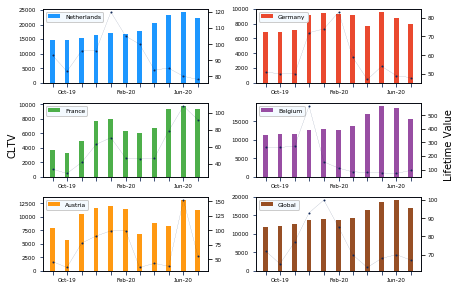

In [25]:
# MRR CLTV LIFETIME GRAPH
import datetime

# six_months = date.today() + relativedelta(months=-8)
# six_month_ago = six_months.month

# # START
# previousmonth = datetime.datetime.now().month-2
# previousyear = datetime.datetime.now().year-1
# start = str(previousyear) + '-' + str(six_month_ago) + '-' + '02'
# # TILL
# currentyear = datetime.datetime.now().year
# till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

# SELECT VARIABLES X, Y, LABELNAMES
# START
previousmonth = datetime.datetime.now().month-1
previousyear = datetime.datetime.now().year-1
start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
# TILL
previousmonth = datetime.datetime.now().month-1
currentyear = datetime.datetime.now().year
till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

# SELECT VARIABLES X, Y, LABELNAMES
xs = df_GLOBAL.loc[start:till].index
axbar_NL = df_NL.loc[start:till]['CLTV_capped']
axbar_DE = df_DE.loc[start:till]['CLTV_capped']
axbar_FR = df_FR.loc[start:till]['CLTV_capped']
axbar_BE = df_BE.loc[start:till]['CLTV_capped']
axbar_AT = df_AT.loc[start:till]['CLTV_capped']
axbar_ES = df_ES.loc[start:till]['CLTV_capped']
axbar_IT = df_IT.loc[start:till]['CLTV_capped']
axbar_GLOBAL = df_GLOBAL.loc[start:till]['CLTV_capped']

#MRR VALUES
axline_NL2 = df_NL.loc[start:till]['lifetime_value']
axline_DE2 = df_DE.loc[start:till]['lifetime_value']
axline_FR2 = df_FR.loc[start:till]['lifetime_value']
axline_BE2 = df_BE.loc[start:till]['lifetime_value']
axline_AT2 = df_AT.loc[start:till]['lifetime_value'] 
axline_ES2 = df_ES.loc[start:till]['lifetime_value']
axline_IT2 = df_IT.loc[start:till]['lifetime_value'] 
axline_GLOBAL2 = df_GLOBAL.loc[start:till]['lifetime_value'] 


list_countries = ["netherlands", "germany", "france", "belgium", "austria", "global", "spain", "italy"]

plots = {
  "netherlands": [axbar_NL, country_colors["NL"], "Netherlands", axline_NL2],  
  "germany": [axbar_DE, country_colors["DE"], "Germany", axline_DE2],
  "france": [axbar_FR, country_colors["FR"], "France", axline_FR2],
  "belgium": [axbar_BE, country_colors["BE"], "Belgium", axline_BE2],
  "austria": [axbar_AT, country_colors["AT"], "Austria", axline_AT2],
  #"spain": [axbar_ES, country_colors["ES"], "Spain", axline_ES2],
  #"italy": [axbar_IT, country_colors["IT"], "Italy", axline_IT2],
  "global": [axbar_GLOBAL, country_colors["GLOBAL"], "Global", axline_GLOBAL2]
}


# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))

fig, ax = plt.subplots(3, 2)

linewidth = 0.4

import matplotlib.pyplot as plt
plt.locator_params(axis='x', nbins=1)
formatter = mdates.DateFormatter("%b-%y") 

i = 0
for a in range(3):
    for b in range(2):
        if i < 7:
            ax[a,b].bar(xs, plots[list_countries[i]][0], color=plots[list_countries[i]][1], label=plots[list_countries[i]][2], width=10) 
            ax1 = ax[a,b].twinx()
            ax1.plot(xs, plots[list_countries[i]][3], color=country_colors["ES"], linewidth=0.1, marker='o', markersize=1) 
            #ax[a,b].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))  
            ax[a,b].xaxis.set_major_formatter(formatter)
            ax[a,b].legend(prop={'size': 6}, facecolor=whiteblue, framealpha=1,frameon = 1)
            #ax1.legend()
           
            # Remove label x-axis, reduce to two
            every_nth = 4
            for n, label in enumerate(ax[a,b].xaxis.get_ticklabels()):
                if n % every_nth != 1:
                    label.set_visible(False)

            # Change color of the ticks and spines    
            ax[a,b].tick_params(color=darkblue)
            for spine in ax[a,b].spines.values():
                spine.set_edgecolor(darkblue)

            # Make ranges fit better on the y axis.
            #ax[a,b].set_ylim([plots[list_countries[i]][0].min()*0.85, plots[list_countries[i]][0].max()*1.15])
           
            i = i + 1 
               
        else: 
            break


fig.text(1.01, 0.5, 'Lifetime Value', ha='center', va='center', rotation='vertical')
fig.text(0, 0.5, 'CLTV', ha='center', va='center', rotation='vertical')
#ax1.set_ylabel('common ylabel')    
# Add some spacing between the graphs and delete the last graph.       
fig.tight_layout(pad=0.6)    
#fig.delaxes(ax[2][2])

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\testtest', bbox_inches='tight', dpi=300)
plt.show()

In [26]:
def graph_15():  
    import datetime
    import matplotlib.ticker
    from datetime import date
    from dateutil.relativedelta import relativedelta

    six_months = date.today() + relativedelta(months=-7)
    six_month_ago = six_months.month

    # START
    previousmonth = datetime.datetime.now().month-2
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(six_month_ago) + '-' + '02'
    # TILL
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    axbar_NL = df_NL.loc[start:till]['CLTV_capped']
    axbar_DE = df_DE.loc[start:till]['CLTV_capped']
    axbar_FR = df_FR.loc[start:till]['CLTV_capped']
    axbar_BE = df_BE.loc[start:till]['CLTV_capped']
    axbar_AT = df_AT.loc[start:till]['CLTV_capped']
    #MRR VALUES
    axbar_NL2 = df_NL.loc[start:till]['mrr_cltv']
    axbar_DE2 = df_DE.loc[start:till]['mrr_cltv']
    axbar_FR2 = df_FR.loc[start:till]['mrr_cltv']
    axbar_BE2 = df_BE.loc[start:till]['mrr_cltv']
    axbar_AT2 = df_AT.loc[start:till]['mrr_cltv']

    width = 0.13
    N = 5
    ind = np.arange(N)

    # Set figure size 
    fig = plt.figure(figsize=(7.25, 3.5))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    #plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # remove ticks
    #plt.tick_params(axis=u'both', which=u'both',length=0)

    # define data
    ax = fig.gca()
    ax2 = ax.twinx()

    # remove frame 
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # remove ticks second ax
    #ax2.tick_params(axis=u'both', which=u'both',length=0)

    # ENTER DATA: [Label, Bar color, Budget color]
    NL = ['Netherlands',lightblue,'#112857']
    DE = ['Germany',lessdarkblue,'#ad2915']
    FR = ['France', darkblue,'#316c2e']
    AT = ['Austria', orange,'#d36a00']
    BE = ['Belgium', '#FFDC00','#6f3977']
    IT = ['Italy', violet,'#ffff00']
    ES = ['Spain', purple,'#063c6a']
    UK = ['United Kingdom','#a65628','#974f25']

    rects4 = ax.bar(ind, axbar_NL, 
           color=country_colors["NL"],
           label="Netherlands",
           align='center', 
           width=width)  
    rects5 = ax.bar(ind-width, axbar_FR, 
           color=country_colors["FR"],
           label="France",
           align='center', 
           width=width) 
    rects3 = ax.bar(ind+width, axbar_DE, 
           color=country_colors["DE"],
           label="Germany",
           align='center', 
           width=width) 
    rects6 = ax.bar(ind-width-width, axbar_BE, 
           color=country_colors["BE"],
           label="Belgium",
           align='center', 
           width=width)    
    rects2 = ax.bar(ind+width+width, axbar_AT, 
           color=country_colors["AT"],
           label="Austria",
           align='center', 
           width=width) 

    total_months = len(axbar_NL.dropna())
    def autolabel(rects, budget_country,kleur1,kleur2):
        """
        Attach a text label above each bar displaying its height
        """
        i = 0
        for rect in rects:
            height = budget_country[i]
            ax2.plot(rect.get_x()+(0.5*width), height,
               "_", color=kleur1, markersize=7.5, markeredgecolor=kleur2)
            #ax.plot(height, marker="_")
            i = i +1
            if i == total_months:
                break

    autolabel(rects2, axbar_AT2,country_colors["AT"],'000000')  
    autolabel(rects3, axbar_DE2,country_colors["DE"],'000000')  
    autolabel(rects4, axbar_NL2,country_colors["NL"],'000000')  
    autolabel(rects5, axbar_FR2,country_colors["FR"],'000000')  
    autolabel(rects6, axbar_BE2,country_colors["BE"],'000000')  

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['€ {:,}'.format(int(x)) for x in ax.get_yticks().tolist()])     

    # super mega beun, maar anders krijg je een object not callable error, terwijl datetime hierboven geimporteerd is, vaag, maar werkt
    from datetime import datetime
    ax.set_xticks(ind+(width/2))
    ax.set_xticklabels(xs.strftime('%b-%y')) 

    # DETERMINE HEIGHT Y-AXIS
    max_cltv = pd.concat([axbar_NL,axbar_DE,axbar_FR,axbar_BE,axbar_AT])
    max_mrr = pd.concat([axbar_NL2,axbar_DE2,axbar_FR2,axbar_BE2,axbar_AT2])

    ax.set_ylim(ymax = max_cltv.max()+(max_cltv.max()/7), ymin = 0)
    ax2.set_ylim(ymax = max_mrr.max()+(max_mrr.max()/7), ymin = max_mrr.min()-(max_mrr.max()/7))

    # Add legend, this can only be after 'labels' are defined
    ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.1),ncol=5, frameon=False)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph15', bbox_inches='tight', dpi=300)
    plt.show()

In [27]:
# METRICS GRAPHS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def churn_ABC():
    import datetime

    # SELECT VARIABLES X, Y, LABELNAMES
    # START
    previousmonth = datetime.datetime.now().month-1
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
    # TILL
    previousmonth = datetime.datetime.now().month-1
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL.loc[start:till].index
    ysline_NL = df_NL.loc[start:till]['rolling_churn_ABC'] 
    ysline_DE = df_DE.loc[start:till]['rolling_churn_ABC'] 
    ysline_AT = df_AT.loc[start:till]['rolling_churn_ABC'] 
    ysline_FR = df_FR.loc[start:till]['rolling_churn_ABC']     
    ysline_BE = df_BE.loc[start:till]['rolling_churn_ABC'] 
    ysline_ES = df_ES.loc[start:till]['rolling_churn_ABC']     
    ysline_IT = df_IT.loc[start:till]['rolling_churn_ABC'] 
    ysline_GLOBAL = df_GLOBAL.loc[start:till]['rolling_churn_ABC']     

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # set grid lines
    plt.grid(linestyle='--', linewidth=0.1, axis='y', color='grey')

    # create plot
    ax = fig.gca()
    
    linewidth = 0.4
    # CS Netherlands
    ax.plot(xs, ysline_NL, 
           color=country_colors["NL"],
           label="Netherlands",
           linewidth=linewidth,
           marker='o',
           markersize=1)    
    # CS Germany
    ax.plot(xs, ysline_DE,
            color=country_colors["DE"], 
            label="Germany",
            linewidth=linewidth,
            marker='o',
            markersize=1) 
    # CS France
    ax.plot(xs, ysline_FR,
            color=country_colors["FR"], 
            label="France",
            linewidth=linewidth,
            marker='o',
            markersize=1)  
    # CS Belgium
    ax.plot(xs, ysline_BE, 
           color=country_colors["BE"],
           label="Belgium",
            linewidth=linewidth,
            marker='o',
            markersize=1)    
    # CS Austria
    ax.plot(xs, ysline_AT,
            color=country_colors["AT"], 
            label="Austria",
            linewidth=linewidth,
            marker='o',
            markersize=1) 
    # CS Spain
    ax.plot(xs, ysline_ES,
            color=country_colors["ES"], 
            label="Spain",
            linewidth=linewidth,
            marker='o',
            markersize=1)      
    # CS Italy
    ax.plot(xs, ysline_IT,
            color=country_colors["IT"], 
            label="Italy",
            linewidth=linewidth,
            marker='o',
            markersize=1) 
    # CS Italy
    ax.plot(xs, ysline_GLOBAL,
            color=country_colors["GLOBAL"],
            label="Global",
            linewidth=0.95,
            linestyle='--',
            marker='o',
            markersize=1)  
    # Plot Target
    ax.axhline(y=0.02, color=country_colors["GLOBAL_DARK"], label = 'Target', linestyle='--',linewidth=0.95)    

    # Format Y-Axis
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))    

    # Format X-Axis    
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator) 

    # Add legend, this can only be after 'labels' are defined
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=3, prop={'size': 7}, frameon=False)

    ax.tick_params(axis=u'both', which=u'both',length=0)    

    #plt.savefig('graph11',  bbox_inches='tight', dpi=300)
    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\churn_ABC', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
    plt.show()

<Figure size 481.68x230.4 with 0 Axes>

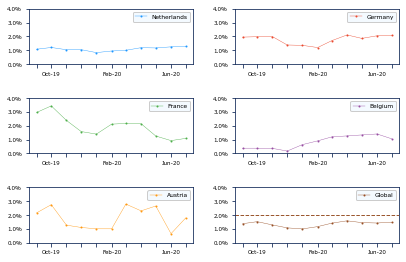

In [28]:
# BROKER MARGIN PER COUNTRY LINES
# METRICS GRAPHS!
#def new_churnABC():
import datetime

# SELECT VARIABLES X, Y, LABELNAMES
previousmonth = datetime.datetime.now().month-1
previousyear = datetime.datetime.now().year-1
start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
# TILL
previousmonth = datetime.datetime.now().month-1
currentyear = datetime.datetime.now().year
till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

# SELECT VARIABLES X, Y, LABELNAMES
xs = df_GLOBAL.loc[start:till].index
ysline_NL = df_NL.loc[start:till]['rolling_churn_ABC'] 
ysline_DE = df_DE.loc[start:till]['rolling_churn_ABC'] 
ysline_AT = df_AT.loc[start:till]['rolling_churn_ABC'] 
ysline_FR = df_FR.loc[start:till]['rolling_churn_ABC']     
ysline_BE = df_BE.loc[start:till]['rolling_churn_ABC'] 
ysline_ES = df_ES.loc[start:till]['rolling_churn_ABC']     
ysline_IT = df_IT.loc[start:till]['rolling_churn_ABC'] 
ysline_GLOBAL = df_GLOBAL.loc[start:till]['rolling_churn_ABC']      

list_countries = ["netherlands", "germany", "france", "belgium", "austria","global", "spain", "italy"]

plots = {
"netherlands": [ysline_NL, country_colors["NL"], "Netherlands", 0],  
"germany": [ysline_DE, country_colors["DE"], "Germany", 0],
"france": [ysline_FR, country_colors["FR"], "France", 0],
"belgium": [ysline_BE, country_colors["BE"], "Belgium", 0],
"austria": [ysline_AT, country_colors["AT"], "Austria", 0],
#"spain": [ysline_ES, country_colors["ES"], "Spain", 0],
#"italy": [ysline_IT, country_colors["IT"], "Italy", 0],
"global": [ysline_GLOBAL, country_colors["GLOBAL"], "Global", 0.02]
}


# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))

fig, ax = plt.subplots(3, 2)

linewidth = 0.4

import matplotlib.pyplot as plt
plt.locator_params(axis='x', nbins=1)
formatter = mdates.DateFormatter("%b-%y") 

i = 0
for a in range(3):
    for b in range(2):
        if i < 8:
            ax[a,b].plot(xs, plots[list_countries[i]][0], color=plots[list_countries[i]][1], label=plots[list_countries[i]][2], linewidth=linewidth, marker='o', markersize=1) 
            ax[a,b].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))  
            ax[a,b].xaxis.set_major_formatter(formatter)
            ax[a,b].legend(prop={'size': 6}, facecolor=whiteblue, framealpha=1,frameon = 1)

            ax[a,b].axhline(y=plots[list_countries[i]][3], color=plots[list_countries[i]][1], label = 'Target', linestyle='--', linewidth=0.95)    
            
            # Remove label x-axis, reduce to two
            every_nth = 4
            for n, label in enumerate(ax[a,b].xaxis.get_ticklabels()):
                if n % every_nth != 1:
                    label.set_visible(False)

            # Change color of the ticks and spines    
            ax[a,b].tick_params(color=darkblue)
            for spine in ax[a,b].spines.values():
                spine.set_edgecolor(darkblue)

            # Make ranges fit better on the y axis.
            #ax[a,b].set_ylim([plots[list_countries[i]][0].min()*0.85, plots[list_countries[i]][0].max()*1.15])
            ax[a,b].set_ylim(0, 0.04)    
            i = i + 1 
            
        else: 
            break

# Add some spacing between the graphs and delete the last graph.       
fig.tight_layout(pad=2)    
#fig.delaxes(ax[2][2])

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\new_churnABC', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
plt.show()

In [29]:
# METRICS GRAPHS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def churn_DE():
    import datetime

    # SELECT VARIABLES X, Y, LABELNAMES
    # START
    previousmonth = datetime.datetime.now().month-1
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
    # TILL
    previousmonth = datetime.datetime.now().month-1
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL.loc[start:till].index
    ysline_NL = df_NL.loc[start:till]['rolling_churn_DE'] 
    ysline_DE = df_DE.loc[start:till]['rolling_churn_DE'] 
    ysline_AT = df_AT.loc[start:till]['rolling_churn_DE'] 
    ysline_FR = df_FR.loc[start:till]['rolling_churn_DE']     
    ysline_BE = df_BE.loc[start:till]['rolling_churn_DE'] 
    ysline_ES = df_ES.loc[start:till]['rolling_churn_DE']     
    ysline_IT = df_IT.loc[start:till]['rolling_churn_DE'] 
    ysline_GLOBAL = df_GLOBAL.loc[start:till]['rolling_churn_DE']     

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # set grid lines
    plt.grid(linestyle='--', linewidth=0.1, axis='y', color='grey')

    # create plot
    ax = fig.gca()
    
    # CS Netherlands
    ax.plot(xs, ysline_NL, 
           color=country_colors["NL"],
           label="Netherlands",
           linewidth=0.4,
           marker='o',
           markersize=1)    
    # CS Germany
    ax.plot(xs, ysline_DE,
            color=country_colors["DE"], 
            label="Germany",
            linewidth=0.4,
            marker='o',
            markersize=1) 
    # CS France
    ax.plot(xs, ysline_FR,
            color=country_colors["FR"], 
            label="France",
            linewidth=0.4,
            marker='o',
            markersize=1)  
    # CS Belgium
    ax.plot(xs, ysline_BE, 
           color=country_colors["BE"],
           label="Belgium",
            linewidth=0.4,
            marker='o',
            markersize=1)    
    # CS Austria
    ax.plot(xs, ysline_AT,
            color=country_colors["AT"], 
            label="Austria",
            linewidth=0.4,
            marker='o',
            markersize=1) 
    # CS Spain
    ax.plot(xs, ysline_ES,
            color=country_colors["ES"], 
            label="Spain",
            linewidth=0.4,
            marker='o',
            markersize=1)      
    # CS Italy
    ax.plot(xs, ysline_IT,
            color=country_colors["IT"], 
            label="Italy",
            linewidth=0.4,
            marker='o',
            markersize=1) 
    # CS Global
    ax.plot(xs, ysline_GLOBAL,
            color=country_colors["GLOBAL"],
            label="Global",
            linewidth=0.95,
            linestyle='--',
            marker='o',
            markersize=1)  
  
    # Format Y-Axis
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))    

    # Format X-Axis    
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator) 

    # Add legend, this can only be after 'labels' are defined
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=4, prop={'size': 7}, frameon=False)

    ax.tick_params(axis=u'both', which=u'both',length=0)    

    #plt.savefig('graph11',  bbox_inches='tight', dpi=300)
    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\churn_DE', bbox_inches='tight', dpi=300)
    plt.show()


<Figure size 481.68x230.4 with 0 Axes>

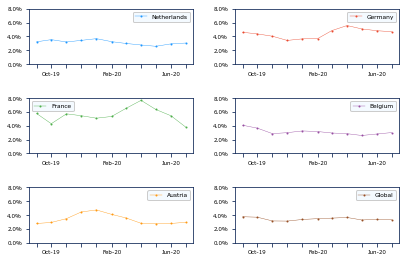

In [30]:
#def new_churnDE():
#def margins():
import datetime

# SELECT VARIABLES X, Y, LABELNAMES
previousmonth = datetime.datetime.now().month-1
previousyear = datetime.datetime.now().year-1
start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
# TILL
previousmonth = datetime.datetime.now().month-1
currentyear = datetime.datetime.now().year
till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

# SELECT VARIABLES X, Y, LABELNAMES
xs = df_GLOBAL.loc[start:till].index
ysline_NL = df_NL.loc[start:till]['rolling_churn_DE'] 
ysline_DE = df_DE.loc[start:till]['rolling_churn_DE'] 
ysline_AT = df_AT.loc[start:till]['rolling_churn_DE'] 
ysline_FR = df_FR.loc[start:till]['rolling_churn_DE']     
ysline_BE = df_BE.loc[start:till]['rolling_churn_DE'] 
ysline_ES = df_ES.loc[start:till]['rolling_churn_DE']     
ysline_IT = df_IT.loc[start:till]['rolling_churn_DE'] 
ysline_GLOBAL = df_GLOBAL.loc[start:till]['rolling_churn_DE']      

list_countries = ["netherlands", "germany", "france", "belgium", "austria","global", "spain", "italy"]

plots = {
"netherlands": [ysline_NL, country_colors["NL"], "Netherlands", 0],  
"germany": [ysline_DE, country_colors["DE"], "Germany", 0],
"france": [ysline_FR, country_colors["FR"], "France", 0],
"belgium": [ysline_BE, country_colors["BE"], "Belgium", 0],
"austria": [ysline_AT, country_colors["AT"], "Austria", 0],
#"spain": [ysline_ES, country_colors["ES"], "Spain", 0],
#"italy": [ysline_IT, country_colors["IT"], "Italy", 0],
"global": [ysline_GLOBAL, country_colors["GLOBAL"], "Global", 0]
}


# Set figure size 
fig = plt.figure(figsize=(6.69, 3.2))

fig, ax = plt.subplots(3, 2)

linewidth = 0.4

import matplotlib.pyplot as plt
plt.locator_params(axis='x', nbins=1)
formatter = mdates.DateFormatter("%b-%y") 

i = 0
for a in range(3):
    for b in range(2):
        if i < 8:
            ax[a,b].plot(xs, plots[list_countries[i]][0], color=plots[list_countries[i]][1], label=plots[list_countries[i]][2], linewidth=linewidth, marker='o', markersize=1) 
            ax[a,b].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))  
            ax[a,b].xaxis.set_major_formatter(formatter)
            ax[a,b].legend(prop={'size': 6}, facecolor=whiteblue, framealpha=1,frameon = 1)

            ax[a,b].axhline(y=plots[list_countries[i]][3], color=plots[list_countries[i]][1], label = 'Target', linestyle='--', linewidth=0.95)    
            
            # Remove label x-axis, reduce to two
            every_nth = 4
            for n, label in enumerate(ax[a,b].xaxis.get_ticklabels()):
                if n % every_nth != 1:
                    label.set_visible(False)

            # Change color of the ticks and spines    
            ax[a,b].tick_params(color=darkblue)
            for spine in ax[a,b].spines.values():
                spine.set_edgecolor(darkblue)

            # Make ranges fit better on the y axis.
            #ax[a,b].set_ylim([plots[list_countries[i]][0].min()*0.85, plots[list_countries[i]][0].max()*1.15])
            ax[a,b].set_ylim(0, 0.08)    
            i = i + 1 
            
        else: 
            break



# Add some spacing between the graphs and delete the last graph.       
fig.tight_layout(pad=2)    
#fig.delaxes(ax[2][2])

plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\new_churnDE', bbox_inches='tight', dpi=300)
plt.show()

In [31]:
def graph_17():
    import datetime
        # START
    previousmonth = datetime.datetime.now().month-1
    previousyear = datetime.datetime.now().year-1
    start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
    # TILL
    previousmonth = datetime.datetime.now().month-1
    currentyear = datetime.datetime.now().year
    till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'
    
    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL.loc[start:till].index
    ysbar_NL = df_NL.loc[start:till]['total_support_tickets']
    ysbar_DE = df_DE.loc[start:till]['total_support_tickets']
    ysbar_AT = df_AT.loc[start:till]['total_support_tickets']
    ysbar_FR = df_FR.loc[start:till]['total_support_tickets']
    ysbar_BE = df_BE.loc[start:till]['total_support_tickets']
    ysbar_ES = df_ES.loc[start:till]['total_support_tickets']    
    ysbar_IT = df_IT.loc[start:till]['total_support_tickets'] 
    volume_vs_shipment = df_GLOBAL.loc[start:till]['volume_vs_shipment_support']

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # create left axis
    ax = fig.gca()

    data = np.array([ysbar_NL, ysbar_DE, ysbar_FR, ysbar_BE, ysbar_AT, ysbar_ES, ysbar_IT])
    bottom = np.vstack((np.zeros((data.shape[1],), dtype=data.dtype),
                        np.cumsum(data, axis=0)[:-1]))
    colors = (country_colors["NL"], country_colors["DE"], country_colors["FR"], country_colors["BE"], country_colors["AT"], country_colors["ES"], country_colors["IT"])
    labels = ["Netherlands", "Germany", "France", "Belgium", "Austria", "Spain", "Italy"]
    for dat, col, bot, lab in zip(data, colors, bottom, labels):
        ax.bar(xs, dat, color=col, bottom=bot, label=lab, width=4) 

    # create right axis   
    ax2 = ax.twinx()
    ax2.plot(volume_vs_shipment, label = 'Volume vs. Shipments', linestyle='--', color=country_colors["ES_DARK"])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=4, prop={'size': 7}, frameon=False)
    ax2.legend(loc='upper right', bbox_to_anchor=(0.997, -0.165),ncol=4, prop={'size': 7}, frameon=False)

    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # edit label ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)
    ax.tick_params(axis=u'both', which=u'both',length=0)    
    ax2.tick_params(axis=u'both', which=u'both',length=0)

    # FORMATTING THE NUMBERS
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])     
    # Percent formatter
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))   
    
    # Format X-Axis    
    formatter = mdates.DateFormatter("%b-%y") 
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator)    
    
    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph17', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
    plt.show()

    #https://stackoverflow.com/questions/19060144/more-efficient-matplotlib-stacked-bar-chart-how-to-calculate-bottom-values

In [32]:
def graph_18():
        import datetime
        previousmonth = datetime.datetime.now().month-1
        previousyear = datetime.datetime.now().year-1
        start = str(previousyear) + '-' + str(previousmonth) + '-' + '02'
        # TILL
        previousmonth = datetime.datetime.now().month-1
        currentyear = datetime.datetime.now().year
        till = str(currentyear) + '-' + str(previousmonth) + '-' + '01'

        # SELECT VARIABLES X, Y, LABELNAMES
        xs = df_GLOBAL.loc[start:till].index
        ysline_NL = df_NL.loc[start:till]['customer_satisfaction']
        ysline_DE = df_DE.loc[start:till]['customer_satisfaction']
        #ysline_AT = df_AT.loc[start:till]['customer_satisfaction']
        ysline_FR = df_FR.loc[start:till]['customer_satisfaction']
        #ysline_BE = df_BE.loc[start:till]['customer_satisfaction']
        ysline_ES = df_ES.loc[start:till]['customer_satisfaction']    
        ysline_IT = df_IT.loc[start:till]['customer_satisfaction'] 


        # Set figure size 
        fig = plt.figure(figsize=(6.69, 3.2))

        # get rid of the frame (gca = getcurrentaxis)
        for spine in plt.gca().spines.values():
                spine.set_visible(False)

        # set grid lines
        plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')
        # ylim sets a max, this way it shows an extra line, should make this dynamic based on max value
        #plt.ylim(ymax = height_y_axis, ymin = 0)
        #print(xs)
        # define data
        ax = fig.gca()

        # CS Netherlands
        ax.plot(xs, ysline_NL, 
                color=country_colors["NL"],
                label="Benelux",
                linewidth=0.4,
                marker='o',
                markersize=1)    
        # CS Germany
        ax.plot(xs, ysline_DE,
                color=country_colors["DE"], 
                label="Dach",
                linewidth=0.4,
                marker='o',
                markersize=1)  
        # CS France
        ax.plot(xs, ysline_FR,
                color=country_colors["FR"], 
                label="France",
                linewidth=0.4,
                marker='o',
                markersize=1)  
        # CS Belgium
        # ax.plot(xs, ysline_BE, 
        #         color=country_colors["BE"],
        #         label="Belgium",
        #         linewidth=0.4,
        #         marker='o',
        #         markersize=1)    
        # CS Austria
        # ax.plot(xs, ysline_AT,
        #         color=country_colors["AT"], 
        #         label="Austria",
        #         linewidth=0.4,
        #         marker='o',
        #         markersize=1)  
        # CS Spain
        ax.plot(xs, ysline_ES,
                color=country_colors["ES"], 
                label="Spain",
                linewidth=0.4,
                marker='o',
                markersize=1)      
        # CS Italy
        ax.plot(xs, ysline_IT,
                color=country_colors["IT"], 
                label="Italy",
                linewidth=0.4,
                marker='o',
                markersize=1)    

        # Percent formatter
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))    

        # Add legend, this can only be after 'labels' are defined
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=3, prop={'size': 9}, frameon=False)

        ax.tick_params(axis=u'both', which=u'both',length=0)    

        # Format X-Axis    
        formatter = mdates.DateFormatter("%b-%y") 
        ax.xaxis.set_major_formatter(formatter)
        locator = mdates.MonthLocator()
        ax.xaxis.set_major_locator(locator)    

        #plt.savefig('graph11',  bbox_inches='tight', dpi=300)
        plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\graph18', bbox_inches='tight', dpi=300)
        plt.show()

In [33]:
def test(): # TEST!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    import datetime

    now = datetime.datetime.now()
    # SELECT VARIABLES X, Y, LABELNAMES
    xs = df_GLOBAL[df_GLOBAL.index.map(lambda x : x.year == now.year)].index
    axbar1 = df_NL[df_NL.index.map(lambda x : x.year == now.year)]['new_net_mrr_new_growth']
    axbar2 = df_DE[df_DE.index.map(lambda x : x.year == now.year)]['new_net_mrr_new_growth']
    axbar3 = df_AT[df_AT.index.map(lambda x : x.year == now.year)]['new_net_mrr_new_growth']
    
    ysline1 = df_NL[df_NL.index.map(lambda x : x.year == now.year)]['budget_new_net_mrr']
    ysline2 = df_DE[df_DE.index.map(lambda x : x.year == now.year)]['budget_new_net_mrr']   
    ysline3 = df_AT[df_AT.index.map(lambda x : x.year == now.year)]['budget_new_net_mrr']
    
    width = 0.2
    N = 12
    ind = np.arange(N)

    # Set figure size 
    fig = plt.figure(figsize=(6.69, 3.2))
    # get rid of the frame (gca = getcurrentaxis)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # set grid lines
    plt.grid(linestyle='-', linewidth=0.1, axis='y', color='grey')

    # remove ticks
    plt.tick_params(axis=u'both', which=u'both',length=0)

    # define data
    ax = fig.gca()

    # plot bar
    ax.bar(ind, axbar1, 
           color=lessdarkblue,
           label="New Net MRR NL",
           align='center', 
           width=width) 
    ax.bar(ind+width, axbar2, 
           color=darkblue,
           label="New Net MRR DE",
           align='center', 
           width=width)     
    ax.bar(ind-width, axbar3, 
           color=green,
           label="New Net MRR AT",
           align='center', 
           width=width)    
    
    # plot line
    ax.plot(ind, ysline1,
            color=lessdarkblue, 
            label="Budget New Net MRR NL",
            linewidth=2)  
    ax.plot(ind, ysline2,
            color=darkblue, 
            label="Budget New Net MRR DE",
            linewidth=2)  
    ax.plot(ind, ysline3,
            color=green, 
            label="Budget New Net MRR AT",
            linewidth=2)
    
    
    # FORMATTING THE NUMBERS
    # get commas between the thousands
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))      

    # super mega beun, maar anders krijg je een object not callable error, terwijl datetime hierboven geimporteerd is, fck vaag, maar werkt
    from datetime import datetime
    ax.set_xticks(ind+(width/2))
    ax.set_xticklabels([datetime(2020,_,1).strftime('%b-%y') for _ in range(1,13)])  

    # Add legend, this can only be after 'labels' are defined
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=3, frameon=False)

    plt.savefig('G:\\My Drive\\Business Controlling\\Reporting\\Monthly Reporting\\Reporting 2020\\2020.' + foldermonth + '\\graphs\\oktest', bbox_inches='tight', dpi=300, facecolor=whiteblue, transparent = True, edgecolor='none')
    plt.show()

    #https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

In [34]:
def main(PATH):
    df_GLOBAL, df_NL, df_DE, df_AT, df_BE, df_ES, df_IT, df_FR = read_in_data(PATH)
    graph1 = graph_1()
    graph2 = graph_2()
    graph3 = graph_3()
    graph4 = graph_4()
    graph5 = graph_5()
    graph6 = graph_6()
    graph7 = graph_7()
    
    # Two tables
    graph8 = graph_8()
    
    
    graph10 = graph_10()
    graph11 = graph_11()       
    graph12 = graph_12()  
    graph13 = graph_13() 
    # Table 14 & 15
    graph_cltv1 = graph_cltv_1()
    graph_MRR1 = graph_MRR()
    churn_ABC16 = churn_ABC()
    #new_churn_ABC = new_churnABC()
    churn_DE17 = churn_DE()
    #new_churn_DE = new_churnDE()    
    graph17 = graph_17()  
    graph18 = graph_18()   
    test1 = test()
    # Table 18
    
    return graph1, graph2, graph3,graph4, graph5, graph6, graph7, graph8, graph10, graph11, graph12, graph13, graph17, graph18, graph_cltv1, graph_MRR1, churn_ABC16, churn_DE17, test1


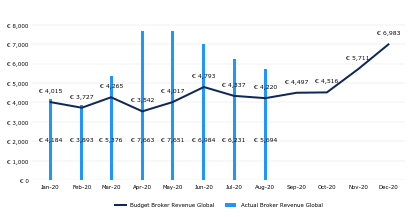

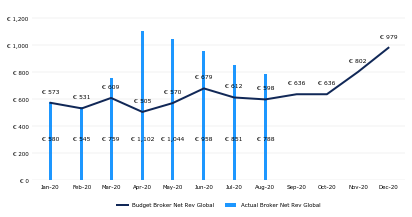

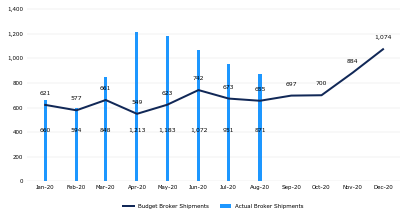

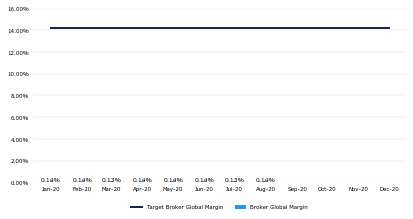

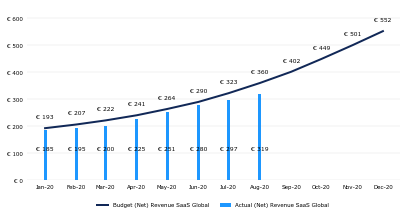

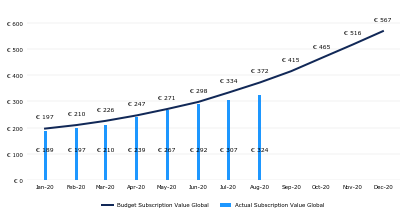

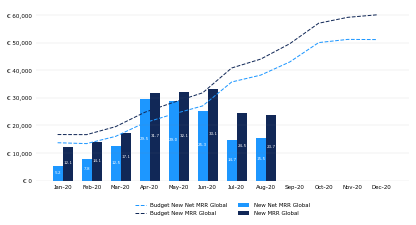

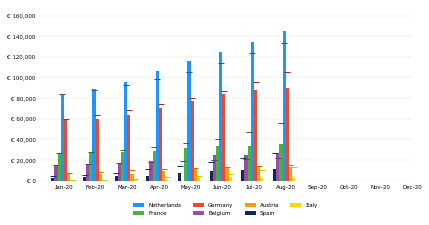

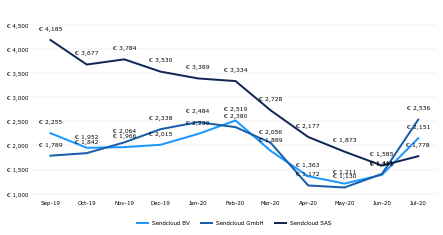

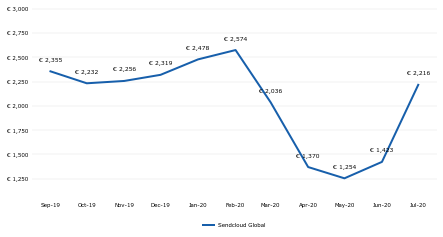

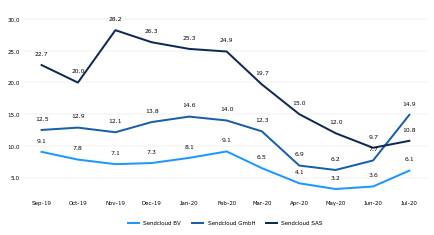

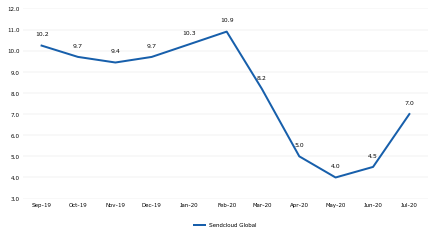

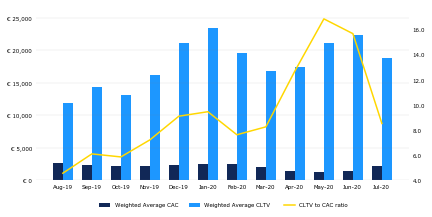

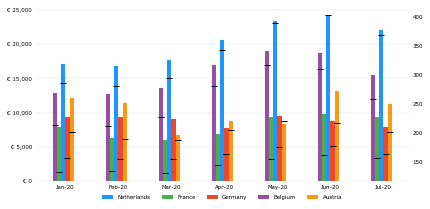

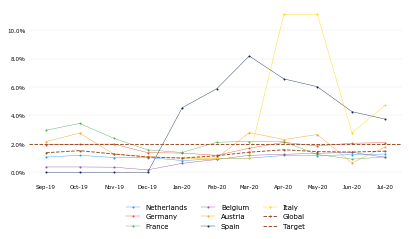

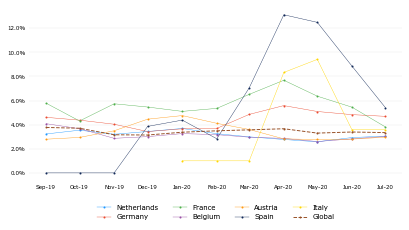

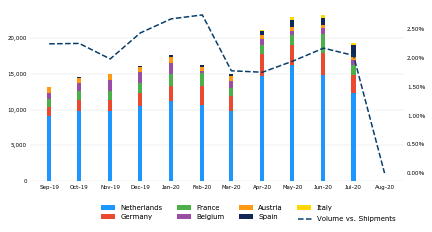

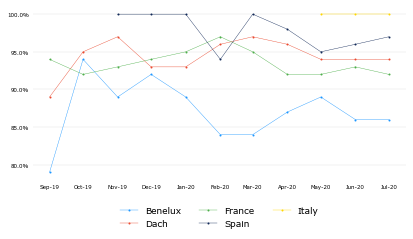

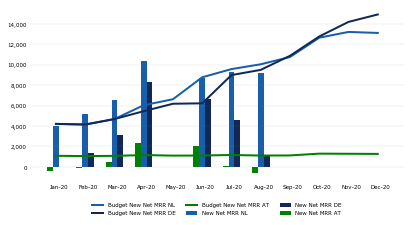

In [35]:
graph1, graph2, graph3,graph4, graph5, graph6, graph7, graph8, graph10, graph11, graph12, graph13, graph17, graph18, graph_cltv1, graph_MRR1, churn_ABC16, churn_DE17, test1 = main(PATH)